# Identifica diferentes tipos de error

<p style="text-align: justify;">Cuando tengamos un conjuto de datos es importante **limpiarlo** y **describirlo**. Cuando se comienza a analizar datos, les tienes que hacer limpieza. Si no es posible que el código que escribas para trabajar con duchos datos seguramente fallará. O incluso peor, si los datos con los que haces los análisis contienen errores, entonces tus análisis también podrían llegar a contener errores.

Por esto hacerle limpieza a los datos es crucial y es una tarea que en la mayoría de casos requiere estar yendo y viniendo entre la etapa de limpieza y la etapa de análisis. Adicionalmente, el tipo de limpieza requerido para un análisis difiere de un proceso estadístico a otro.</p>

In [1]:
import pandas as pd
import numpy as np
import re
import scipy.stats as st
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math

In [2]:
path_tabla_con_errores = 'tabla_con_errores_1.xlsx'
tabla_con_errores = pd.read_excel(path_tabla_con_errores)
tabla_con_errores

,First Name,Email,Date of Birth,Country,Height
0,Leila,leila@example.com,32896,France,1.49m
1,Samuel,samuel_329@example.com,37154,NaN,1.67m
2,Rodney,choupipoune@supermail.eu,12 Sept. 1984,Madagascar,5'2
3,Mark,"marco23@example.com, mc23@supermail.eu",28531,24,1.65m
4,Harry,helloworld@mail.example.com,04/25/1975,Germany,1.34m
5,Hannah,hannah2019@supermail.eu,25569,Canada,2.8m
6,Samuël,samuel_329@example.com,NaN,Benin,1.45m


# Algunos datos con errores
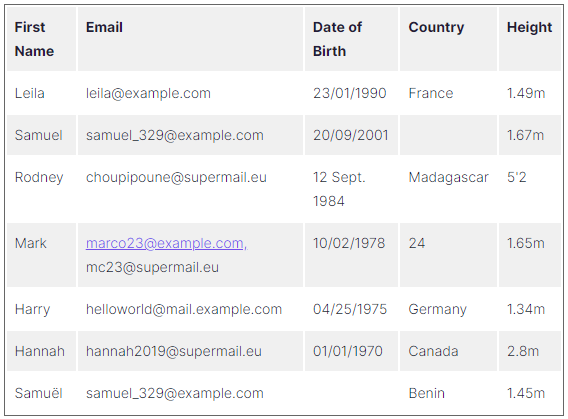

Podemos observar que estos datos no están limpios.
Notemos las inconsistencias:
- "Country" y "Date of Birth" tienen celdas vacías (missing attributes).
- "Country" tiene una celda con el número 24, que claramente no es un país (lexical error).
- La columna "Height" tiene una entrada con una unidad de medida diferente (irregularity error).
- Mark tiene dos correos. (Esto no es necesariamente un error pero en caso de serlo se lo puede clasificar como formatting error).
- Hay errores de formato en "Date of Birth".
- Samuel tiene dos registros diferentes, sabemos que es el mismo Samiel por el correo (duplication error) además tiene dos alturas diferentes (contradiction error).
- Hannah es un "outlier" lo cual indica que contiene un "atypical value" o una "aberration".

Para corregir varios de estos errores basta con eliminar valores o cambiar formatos.

Los errores por valores faltantes (missing attributes), duplicados (duplicates) y datos anormales (outliers) se discutirán más adelante.


# Importante

#### **Algunos de los siguientes métodos consisten en borrar información de nuestra muestra de datos, por lo tanto siempre asegúrate de hacer una copia de tus datos. En esta copia puedes borrar lo que quieras y los el total de datos restantes será una sub-muestra de los la fuente original.**
## Missing attributes

- Si son pocos se pueden ignorar los datos faltantes y no hacer nada al respecto. Esta decisión va a depender del análisis estadístico que se desee realizar.
- Si los datos faltantes no son importantes para el análisis se podría **eliminar** la columna que contenga los datos faltantes.
- Pero si sí importan, se podrían eliminar los registros que correspondientes a los valores faltantes.
- Otra opción es tratar de "adivinar" el valor faltante por medio de imputación (En estadística, la imputación es la sustitución de valores no informados en una observación por otros). Si se usa el promedio de los demás datos para "adivinar" el valor faltante a esto de le llama "mean imputation".


## Outlier

Pueden ser:
- Aberración: Valor que obviamente es falso.
- Valor atípico: Un valor que se desvía de la norma pero no es falso necesariamente 

Si estamos seguros de que el valor es falso, lo eliminamos. Pero si no estamos seguros, debemos tomar la decisión de eliminarlo o no.

## Duplicados

Los duplicados necesitan ser eliminados cuando los encontramos.


In [3]:
data = pd.read_csv('persons.csv')
data

,first name,email,date_of_birth,country,height
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Rodney,choupipoune@supermail.eu,12 sept. 1984,Madagascar,153cm
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,24,1.65m
4,Harry,helloworld@supermail.eu,04/25/1975,Germany,1.34m
5,Hanna,hannah2019@supermail.eu,01/01/1970,Canada,3.45m
6,samuël,samuel_329@example.com,NaN,Benin,1.45m


## Limpieza de datos

A continuación cambiaremos los valores de una columna de un dataframe de mayúsculas a minúsculas.

Nota: 
- El método ".apply(una_funcion)" aplica "una_funcion" a cada uno de los valores de la columna (tipo Series en pandas).
- El atributo ".values" convierte la columna en un arreglo de numpy.
- En la línea 12 cambiamos los valores de la columna "letter" por sus correcpondientes valores en minúscula.
- La línea 10 es opcional pues todo funciona prácticamente igual sin ella.

In [4]:
def lower_case(value): 
    print('Here is the value I am processing : ', value)
    return value.lower()

data = pd.DataFrame([['A',1],
                     ['B',2],
                     ['C',3]], columns = ['letter','position'])

data['letter'] = data['letter'].apply(lower_case)
print(data)

Here is the value I am processing :  A
Here is the value I am processing :  B
Here is the value I am processing :  C
  letter  position
0      a         1
1      b         2
2      c         3


In [5]:
###################### No es necesario  ####################################
new_column = data['letter'].apply(lower_case) # Series data type

new_column = new_column.values
print(new_column)

data['letter'] = new_column
print(data)

Here is the value I am processing :  a
Here is the value I am processing :  b
Here is the value I am processing :  c
['a' 'b' 'c']
  letter  position
0      a         1
1      b         2
2      c         3


### Ahora con nuestro conjunto de datos

In [6]:
# loading and display of data
data = pd.read_csv('persons.csv')
data

,first name,email,date_of_birth,country,height
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Rodney,choupipoune@supermail.eu,12 sept. 1984,Madagascar,153cm
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,24,1.65m
4,Harry,helloworld@supermail.eu,04/25/1975,Germany,1.34m
5,Hanna,hannah2019@supermail.eu,01/01/1970,Canada,3.45m
6,samuël,samuel_329@example.com,NaN,Benin,1.45m


In [7]:
VALID_COUNTRIES = ['France', 'Madagascar', 'Benin', 'Germany',
                    'Canada']
                  
def check_country(country):
    if country not in VALID_COUNTRIES:
        print(' - "{}" is not a valid country, we delete it.'.format(country))
        return np.NaN # not a number y pd.NaT not a time
    return country

In [8]:
# Procesamiento de correos electrónicos
def first(string):
    parts = string.split(',')
    first_part = parts[0]
    if len(parts) >= 2:
        print(' - There are several parts in "{}", we are only keeping {}.'\
            .format(parts,first_part))  
    return first_part

In [9]:
def convert_height(height):
    found = re.search('\d\.\d{2}m', height)
    if found is None:
        print('{} is not in the right format. It will be ignored.'.format(height))
        return np.NaN
    else:
        value = height[:-1] # the last character is removed: 'm'
        return float(value)

def fill_height(height, replacement):
    if pd.isnull(height):
        print('Imputation by the mean : {}'.format(replacement))
        return replacement
    return height

In [10]:
print(re.search('\d\.\d{3}m', '134.495m'))

<re.Match object; span=(2, 8), match='4.495m'>


In [11]:
data['email'] = data['email'].apply(first)
data['country'] = data['country'].apply(check_country)
data['height'] = [convert_height(t) for t in data['height']]
data['height'] = [t if t<3 else np.NaN for t in data['height']]

mean_height = data['height'].mean()
data['height'] = [fill_height(t, mean_height) for t in data['height']]
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'], 
                                           format='%d/%m/%Y', errors='coerce')
print(data)

 - There are several parts in "['marco23@example.com', ' mc23@supermail.eu']", we are only keeping marco23@example.com.
 - "nan" is not a valid country, we delete it.
 - "24" is not a valid country, we delete it.
153cm is not in the right format. It will be ignored.
Imputation by the mean : 1.52
Imputation by the mean : 1.52
  first name                     email date_of_birth     country  height
0      Leila         leila@example.com    1990-01-23      France    1.49
1     Samuel    samuel_329@example.com    2001-09-20         NaN    1.67
2     Rodney  choupipoune@supermail.eu           NaT  Madagascar    1.52
3       Marc       marco23@example.com    1978-02-10         NaN    1.65
4      Harry   helloworld@supermail.eu           NaT     Germany    1.34
5      Hanna   hannah2019@supermail.eu    1970-01-01      Canada    1.52
6     samuël    samuel_329@example.com           NaT       Benin    1.45


In [12]:
data

,first name,email,date_of_birth,country,height
0,Leila,leila@example.com,1990-01-23,France,1.49
1,Samuel,samuel_329@example.com,2001-09-20,NaN,1.67
2,Rodney,choupipoune@supermail.eu,NaT,Madagascar,1.52
3,Marc,marco23@example.com,1978-02-10,NaN,1.65
4,Harry,helloworld@supermail.eu,NaT,Germany,1.34
5,Hanna,hannah2019@supermail.eu,1970-01-01,Canada,1.52
6,samuël,samuel_329@example.com,NaT,Benin,1.45


# Base de datos número 2

In [13]:
data = pd.read_csv("operations.csv",parse_dates=[0])
data

,transaction_date,label,amount,balance_bef_trn,categ,type,expense_slice,debcr,year,month,day,day_week,day_week_num,weekend,quart_month
0,2023-03-31,DONATION XX XX XX XX XX XX XX,-1.44,1515.25,OTHER,DONATION,small,debit,2023,3,31,Friday,5,False,4
1,2023-04-03,PAYMENT XX XX MTA XX,-24.00,1513.81,TRANSPORT,PAYMENT,small,debit,2023,4,3,Monday,1,False,1
2,2023-04-03,PAYMENT XX XX MTA XX,-73.00,1489.81,TRANSPORT,PAYMENT,small,debit,2023,4,3,Monday,1,False,1
3,2023-04-03,PAYMENT XX XX XX XX,-14.39,1416.81,OTHER,PAYMENT,small,debit,2023,4,3,Monday,1,False,1
4,2023-04-03,TRANSFER XX XX XX XX XX XX,4.80,1402.42,OTHER,TRANSFER,(not an expense),credit,2023,4,3,Monday,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2023-10-05,PAYMENT XX XX XX XX,-4.80,2440.94,OTHER,PAYMENT,small,debit,2023,10,5,Thursday,4,False,1
304,2023-10-05,PAYMENT XX XX XX XX XX XX,-10.64,2436.14,OTHER,PAYMENT,small,debit,2023,10,5,Thursday,4,False,1
305,2023-10-06,PRE-AUTH PAYMENT XX TELEPHONE XX XX,-13.58,2425.50,TELEPHONE BILL,OTHER,small,debit,2023,10,6,Friday,5,False,1
306,2023-10-06,PAYMENT XX XX CHEZ LUC XX,-10.00,2411.92,RESTAURANT,PAYMENT,small,debit,2023,10,6,Friday,5,False,1


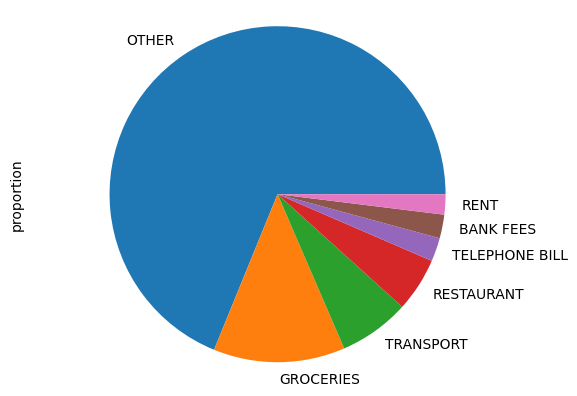

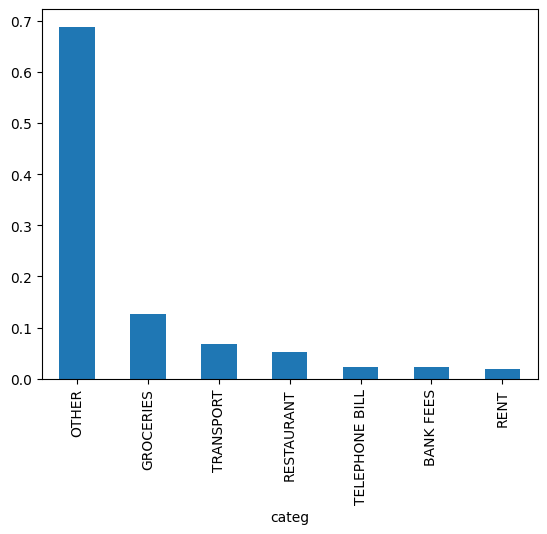

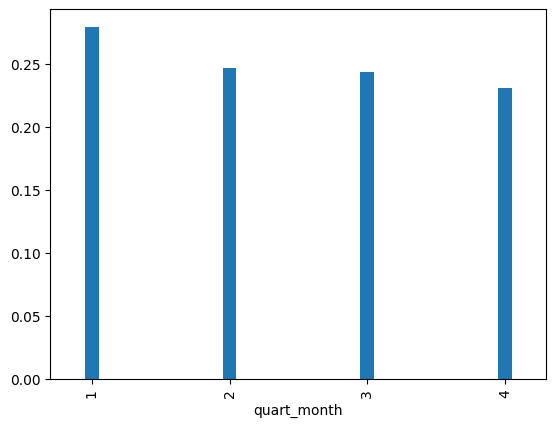

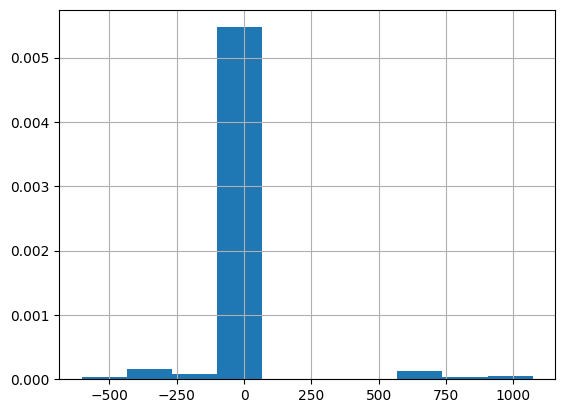

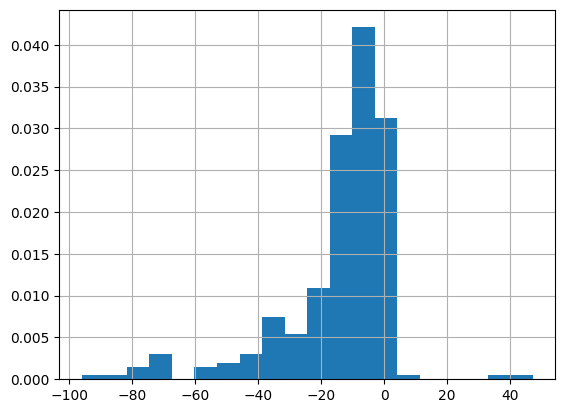

In [14]:
# QUALITATIVE VARIABLE
# Pie chart
data["categ"].value_counts(normalize=True).plot(kind='pie')
# This line ensures that the pie chart is circular, not elliptical
plt.axis('equal') 
plt.show() # Displays the graph

# Bar graph
data["categ"].value_counts(normalize=True).plot(kind='bar')
plt.show()

# QUANTITATIVE VARIABLE
# Vertical line graph
data["quart_month"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()

# Histogram
data["amount"].hist(density=True)
plt.show()
# Prettier Histogram
data[data.amount.abs() < 100]["amount"].hist(density=True,bins=20)
plt.show()

In [15]:
occurrences = data["quart_month"].value_counts()
#print(occurrences)
categories = occurrences.index # the occurrences index contains the categories

tab = pd.DataFrame(categories, columns = ["quart_month"]) # creation of table based on categories
tab["n"] = occurrences.values
tab["f"] = tab["n"] / len(data) # len(data) returns the sample size

tab = tab.sort_values("quart_month") # sorts values of variable X (increasing)
tab["F"] = tab["f"].cumsum() # cumsum calculates the cumulative sum

tab

,quart_month,n,f,F
0,1,86,0.279221,0.279221
1,2,76,0.246753,0.525974
2,3,75,0.243506,0.769481
3,4,71,0.230519,1.000000


In [16]:
len(data)

308

In [17]:
occurrences.index

Index([1, 2, 3, 4], dtype='int64', name='quart_month')

In [18]:
occurrences.values

array([86, 76, 75, 71])

# Medidas de tendencia central

# Medidas de dispersión

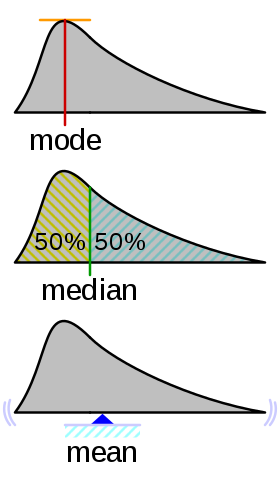
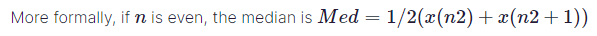

### ¡Siempre debemos saber la media, la desviación estandar y asimetría! (skewness, skew=sesgo)

# Medidas de forma: Skewness y kurtosis

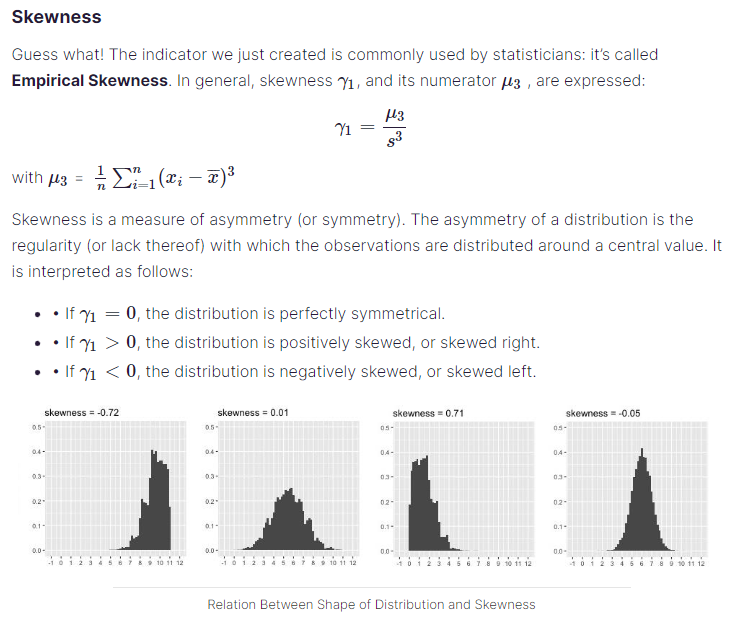
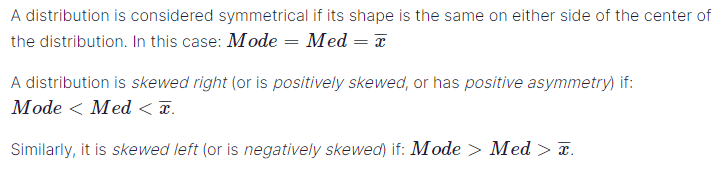

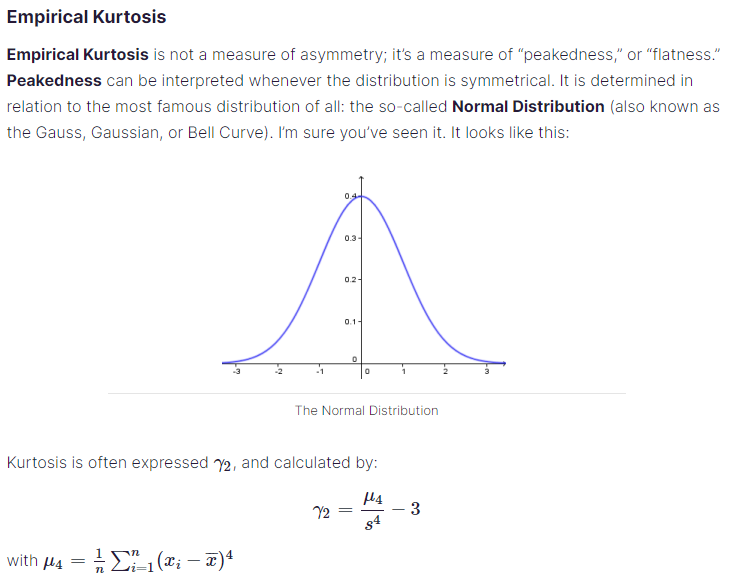
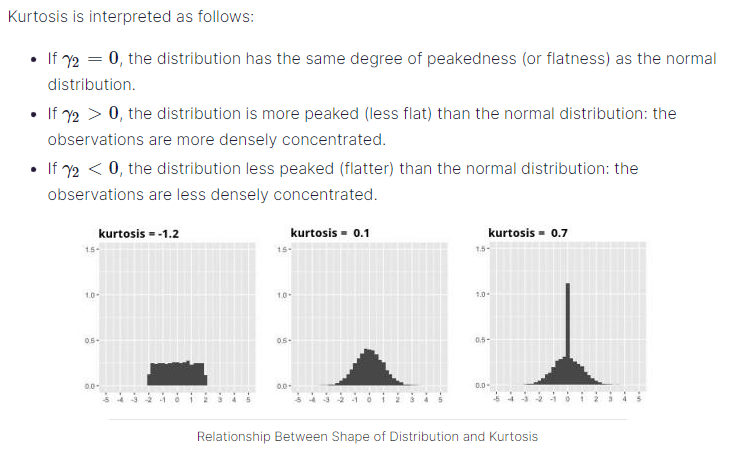

In [19]:
data['amount'].mean()

2.872564935064936

In [20]:
data['amount'].median()

-9.6

In [21]:
data['amount'].mode()

0   -1.6
Name: amount, dtype: float64

The transaction amounts vary widely: there are expenditures (negative amounts) that are sometimes quite large (rents, for example) and expenditures that are often small (groceries, phone, etc.), and there is money coming in (positive amounts) less frequently but in large amounts. It is therefore difficult to interpret the mean (which is very sensitive to atypical values). Here the mean is $2.87. We have the same problem with the median, which is -$9.60. The fact that it is negative tells us, however, that there are more debits than credits. On the other hand, the mode tell us that most of the transactions are around -$1.60. Here, the three measures are very far apart.

To get more uniform transaction amounts, I suggest you calculate these three measures for each transaction category. Within a category, the amounts will be more similar, since the transactions will all be of the same type.

In [22]:
# Filtrado de información
data[data.amount == -1.44]

,transaction_date,label,amount,balance_bef_trn,categ,type,expense_slice,debcr,year,month,day,day_week,day_week_num,weekend,quart_month
0,2023-03-31,DONATION XX XX XX XX XX XX XX,-1.44,1515.25,OTHER,DONATION,small,debit,2023,3,31,Friday,5,False,4
61,2023-05-09,PAYMENT XX XX XX XX,-1.44,4090.10,OTHER,PAYMENT,small,debit,2023,5,9,Tuesday,2,False,2
91,2023-05-31,DONATION XX XX XX XX XX XX XX,-1.44,4154.11,OTHER,DONATION,small,debit,2023,5,31,Wednesday,3,False,4
187,2023-07-31,DONATION XX XX XX XX XX XX XX,-1.44,3310.42,OTHER,DONATION,small,debit,2023,7,31,Monday,1,False,4
267,2023-09-11,PAYMENT XX XX XX XX XX XX,-1.44,3403.37,OTHER,PAYMENT,small,debit,2023,9,11,Monday,1,False,2
268,2023-09-11,PAYMENT XX XX XX XX XX XX,-1.44,3401.93,OTHER,PAYMENT,small,debit,2023,9,11,Monday,1,False,2


In [23]:
data["categ"].unique()

array(['OTHER', 'TRANSPORT', 'TELEPHONE BILL', 'GROCERIES', 'BANK FEES',
       'RESTAURANT', 'RENT'], dtype=object)

Este es el código del curso sin modificar
```python 
for cat in data["categ"].unique():
    subset = data[data.categ == cat] # Creation of sub-sample
    print("-"*20)
    print(cat)
    print("mean:\n",subset['amount'].mean())
    print("med:\n",subset['amount'].median())
    print("mod:\n",subset['amount'].mode())
    print("var:\n",subset['amount'].var(ddof=0))
    print("ect:\n",subset['amount'].std(ddof=0))
    print("skw:\n",subset['amount'].skew())
    print("kur:\n",subset['amount'].kurtosis())
    subset["amount"].hist() # Creates the histogram
    plt.show()  # Displays the histogram
    subset.boxplot(column="amount", vert=False)
    plt.show()

--------------------
OTHER
mean”:
 23.43320754716981
med:
 -8.31
mod:
 0   -1.6
Name: amount, dtype: float64
var:
 40401.82999254183
ect:
 201.00206464746034
skw:
 3.1215325222336427
kur:
 12.716537970826296


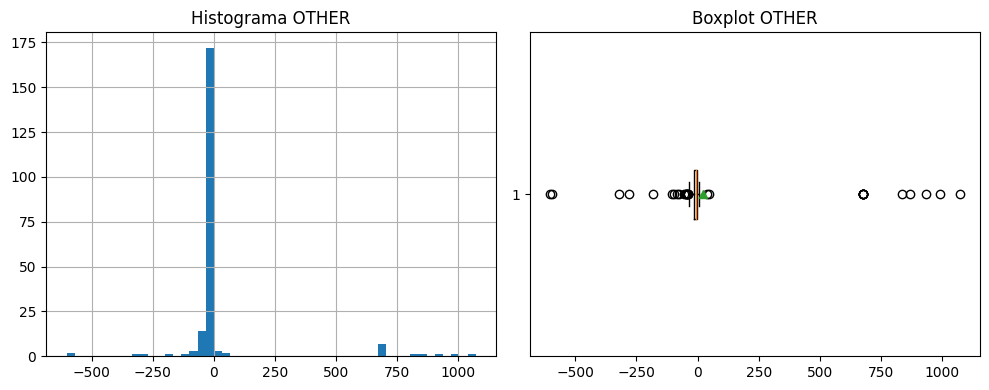

--------------------
TRANSPORT
mean”:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
Name: amount, dtype: float64
var:
 2205.016868027212
ect:
 46.95760713694014
skw:
 -1.248265076217821
kur:
 2.1922705326917487


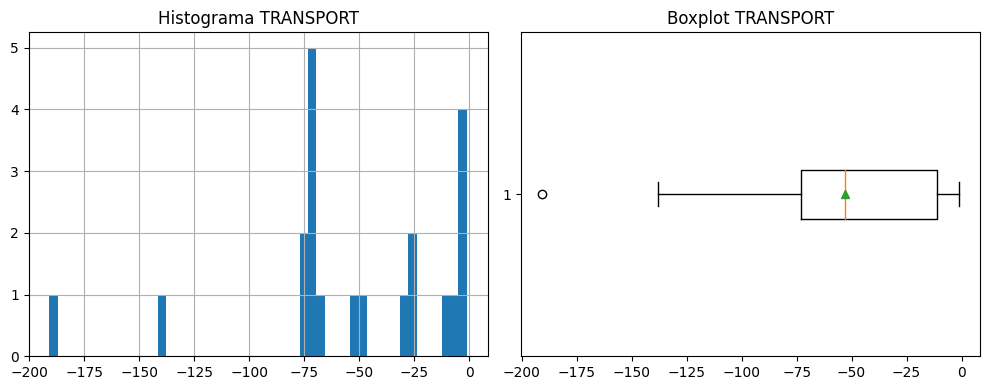

--------------------
TELEPHONE BILL
mean”:
 -12.045714285714283
med:
 -7.02
mod:
 0   -7.02
1   -6.38
Name: amount, dtype: float64
var:
 105.01905306122445
ect:
 10.247880417980317
skw:
 -2.3876514564281526
kur:
 5.798563367885492


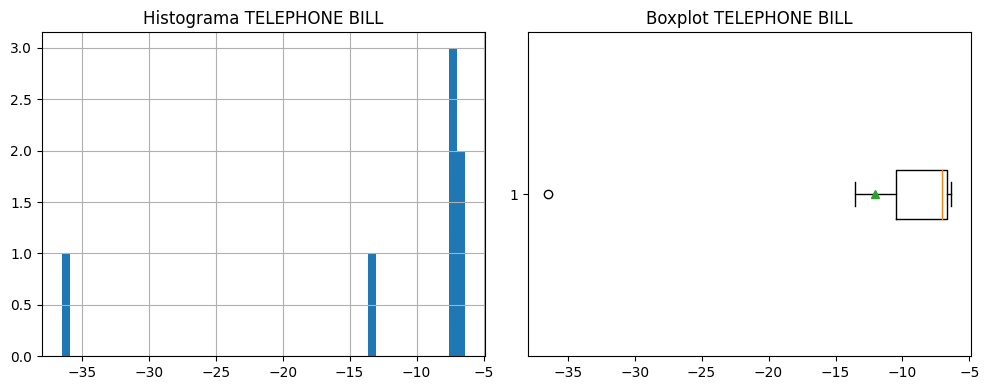

--------------------
GROCERIES
mean”:
 -16.341282051282054
med:
 -12.24
mod:
 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
Name: amount, dtype: float64
var:
 177.0253547666009
ect:
 13.3050875520081
skw:
 -1.246748830645698
kur:
 1.604730494087499


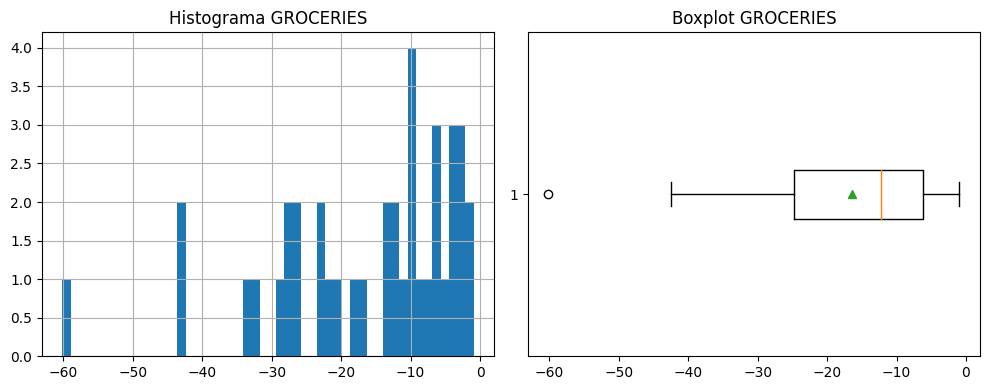

--------------------
BANK FEES
mean”:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
Name: amount, dtype: float64
var:
 0.0015673469387755044
ect:
 0.03958973274443141
skw:
 0.37416573867739106
kur:
 -2.800000000000003


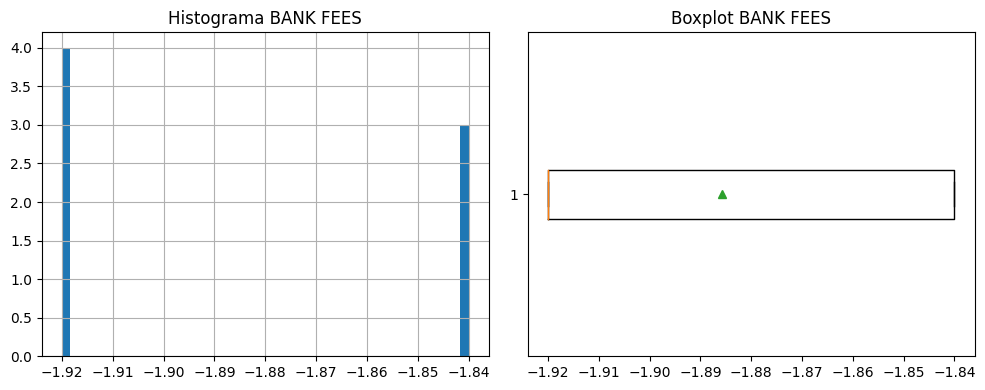

--------------------
RESTAURANT
mean”:
 -10.3325
med:
 -10.1
mod:
 0   -9.2
Name: amount, dtype: float64
var:
 2.8531937500000004
ect:
 1.689139943876765
skw:
 -0.8883503487158837
kur:
 0.5988855591691937


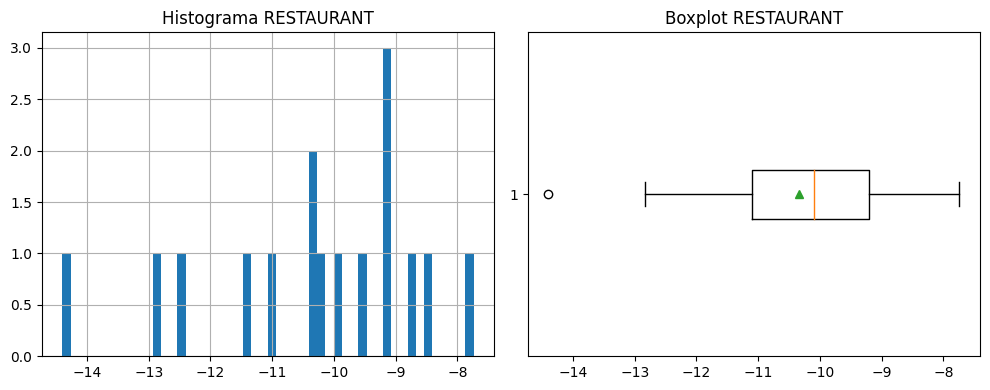

--------------------
RENT
mean”:
 -345.0
med:
 -345.0
mod:
 0   -345.0
Name: amount, dtype: float64
var:
 0.0
ect:
 0.0
skw:
 0
kur:
 0


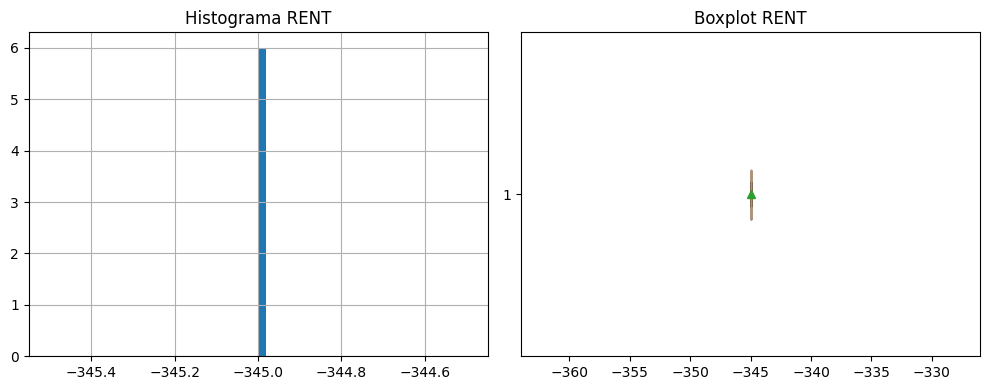

In [24]:
for cat in data["categ"].unique():
    subset = data[data.categ == cat] # Creation of sub-sample
    print("-"*20)
    print(cat)
    print("mean”:\n",subset['amount'].mean())
    print("med:\n",subset['amount'].median())
    print("mod:\n",subset['amount'].mode())
    print("var:\n",subset['amount'].var(ddof=0))
    print("ect:\n",subset['amount'].std(ddof=0))
    print("skw:\n",subset['amount'].skew())
    print("kur:\n",subset['amount'].kurtosis())

    # Crea una figura con dos subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    axs[0].hist(subset["amount"], bins=50) # Creates the histogram
    axs[0].set_title(f'Histograma {cat}')
    axs[0].grid(True)

    axs[1].boxplot(subset["amount"], vert=False, showmeans=True) # Creates the boxplot
    axs[1].set_title(f'Boxplot {cat}')
    #axs[1].grid(True)

    # Ajusta la figura para que se vea mejor
    plt.tight_layout()

    # Muestra la figura
    plt.show()

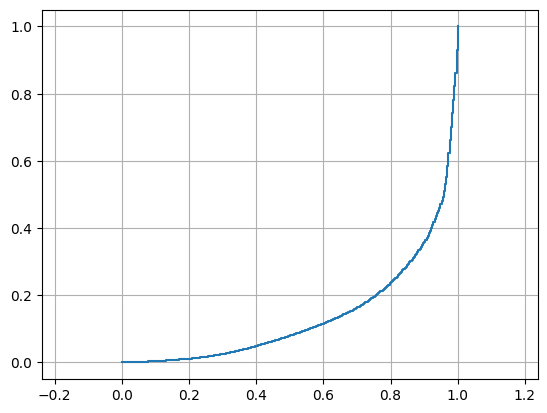

In [25]:
expenses = data[data['amount'] < 0]
exp = -expenses['amount'].values
n = len(exp)
# print(n)
lorenz = np.cumsum(np.sort(exp)) / exp.sum()
# print(lorenz)
lorenz = np.append([0],lorenz) # The Lorenz Curve begins at 0
# print(lorenz)

plt.axes().axis('equal')
# xaxis = np.linspace(0-1/n,1+1/n,n+1) # There is 1 segment (of size n) for each individual, plus 1 segment at y=0. The first segment starts at 0-1/n and the last one finishes at 1+1/n
xaxis = np.linspace(0, 1, len(lorenz))
# print(xaxis)
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.grid(True)
plt.show()

### Índice de Gini

Área entre la curva de Lorentz y la recta y=x multiplicada por 2

In [26]:
# No entiendo los términos restadno en la siguiente línea
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # area under the Lorenz Curve. The first segment (lorenz[0]) is halfly below O, 
# so we divide it by 2. We do the same for the mast segment lorenz[-1]
S = 0.5 - AUC # area between 1st bisector and the Lorenz Curve
gini = 2*S
gini

0.7204386813739185

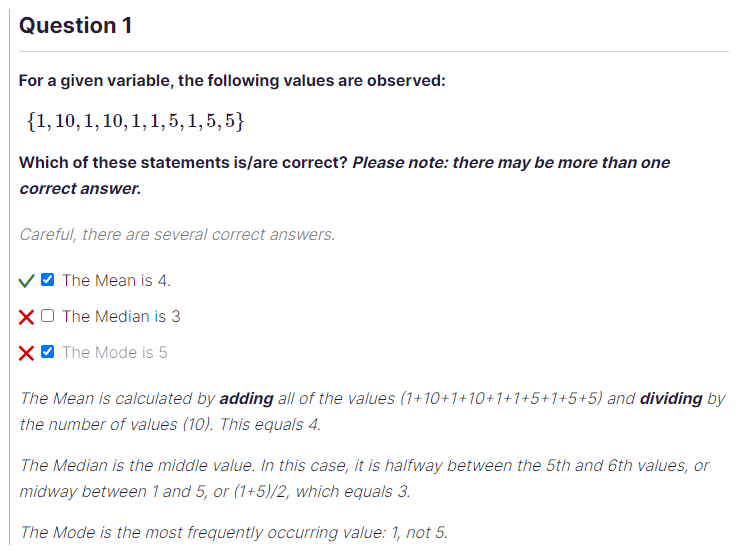

### As soon as we begin talking about correlations, we open ourselves to the possibility of committing a very common error that should **NEVER** be made: that of assuming a cause-and-effect relationship between the two variables in question.

https://www.tylervigen.com/spurious-correlations

# Analisis bivariable cuando las dos variables son cuantitativas

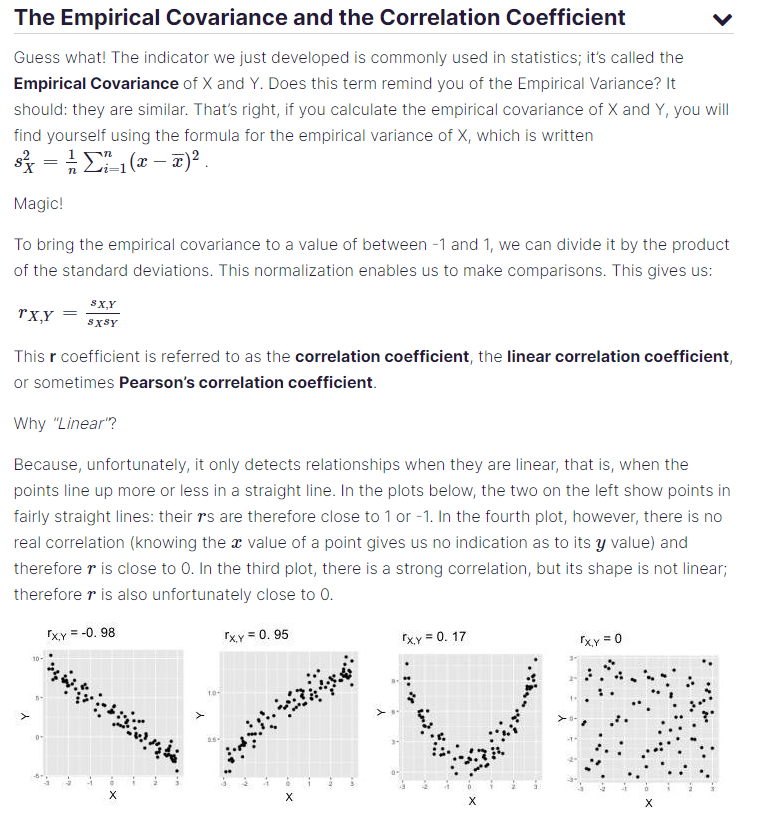

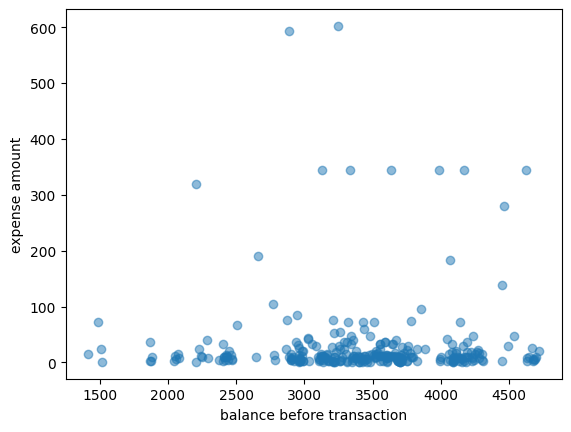

In [27]:
expenses = data[data.amount < 0]
plt.plot(expenses["balance_bef_trn"],-expenses["amount"],'o',alpha=0.5) # El alpha es la transparencia
plt.xlabel("balance before transaction")
plt.ylabel("expense amount")
plt.show()

In [28]:
# Covarianza
np.cov(expenses["balance_bef_trn"],-expenses["amount"],ddof=0)[1,0]

705.0942213554387

In [29]:
# La covarianza es igual si intercambio el orden de las variables
np.cov(-expenses["amount"],expenses["balance_bef_trn"],ddof=0)[1,0]

705.0942213554387

In [30]:
# Coeficiente de correlación/coeficiente de correlación lineal/Coeficiente de correlación de Pearson
st.pearsonr(expenses["balance_bef_trn"],-expenses["amount"])[0]

0.014536146489774594

## Alternativa al diagrama de dispersión

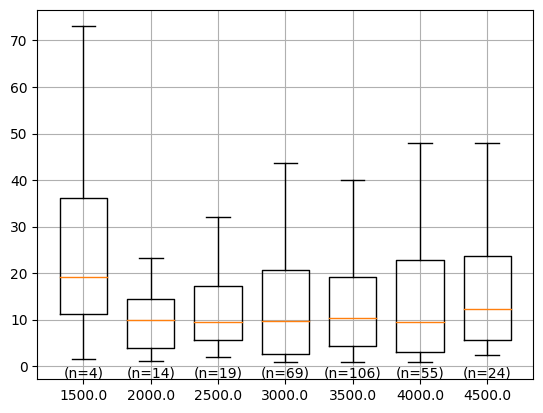

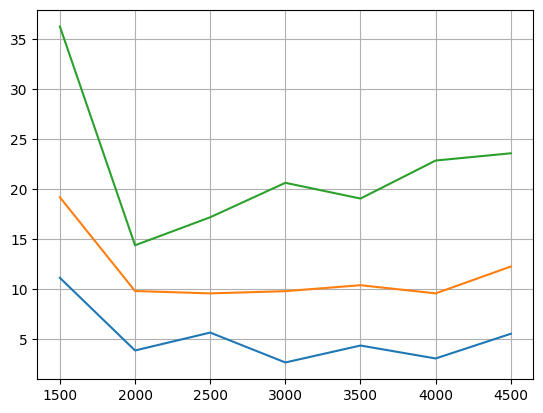

In [31]:
expenses = data[data.amount < 0]

bin_size = 500 # size of bins for discretization

groups = [] # will receive the aggregated data to be displayed

# slices are calculated from 0 to the maximum balance in increments of bin_size]
slices = np.arange(0, max(expenses["balance_bef_trn"]), bin_size)
# print(max(expenses["balance_bef_trn"])) ##################################################################################
# print(slices) ##################################################################################
slices += bin_size/2 # slices are separated by half a bin size
# print(slices) ################################################################################## # un par de elementos consecutivos en "slices" es un tamaño de bin
indices = np.digitize(expenses["balance_bef_trn"], slices) # associates each balance with its bin number
# print(np.array([value for value in expenses["balance_bef_trn"]])) ##################################################################################
# print(indices, len(indices), type(indices)) ##################################################################################
# print(set(indices)) ##################################################################################

# for i in enumerate(slices): ##################################################################################
#     print(i)

for ind, tr in enumerate(slices): # for each slice, ind receives the slice number and tr the slice in question
    amounts = -expenses.loc[indices==ind,"amount"] # selects individuals for the ind slice
    if len(amounts) > 0:
        g = {
            'values': amounts,
            'bin_center': tr-(bin_size/2),
            'size': len(amounts),
            'quartiles': [np.percentile(amounts,p) for p in [25,50,75]]
        }
        groups.append(g)
        # print([np.percentile(amounts,p) for p in [25,50,75]])
# display box plots

plt.boxplot([g["values"] for g in groups],
            positions= [g["bin_center"] for g in groups], # X-axis of box plots
            showfliers= False, # outliers are not included
            widths= bin_size*0.7, # graph width of box plots
           )
# displays occurrences for each bin

for g in groups:
    plt.text(g["bin_center"], 0, "(n={})".format(g["size"]), horizontalalignment='center', verticalalignment='top')
plt.grid(True) ##################################################################################
plt.show()
# display quartiles

for n_quartile in range(3):
    plt.plot([g["bin_center"] for g in groups],
             [g["quartiles"][n_quartile] for g in groups])
plt.grid(True) ##################################################################################
plt.show()

In [32]:
# expenses

In [33]:
# expenses.loc[indices==3,"amount"]

In [34]:
# expenses.loc[indices==3]

In [35]:
# indices==3

In [36]:
'asd'.split(',')[0]

'asd'

In [37]:
dt.datetime.now()

datetime.datetime(2023, 7, 10, 19, 37, 44, 825983)

In [38]:
# Sub-sample is selected
groceries = data[data.categ == "GROCERIES"]

# Transactions are sorted by date
groceries = groceries.sort_values("transaction_date")

# Expenses are converted to positive amounts
groceries["amount"] = -groceries["amount"]

# Wait variable is calculated 
r = []
last_date = dt.datetime.now()
for i,row in groceries.iterrows():
    # print(row["transaction_date"])
    days = (row["transaction_date"]-last_date).days
    if days == 0:
        r.append(r[-1])
    else:
        r.append(days)
    last_date = row["transaction_date"]
groceries["wait"] = r
groceries = groceries.iloc[1:,]
# print(r)

# transactions made on the same date are grouped together
# (groceries bought the same day but in 2 different stores)
a = groceries.groupby("transaction_date")["amount"].sum()
b = groceries.groupby("transaction_date")["wait"].first()
groceries = pd.DataFrame([a for a in zip(a,b)])
groceries.columns = ["amount","wait"]
# groceries

In [39]:
# # Sub-sample is selected
# groceries_ = data[data.categ == "GROCERIES"]

# # Transactions are sorted by date
# groceries_ = groceries_.sort_values("transaction_date")

# # Expenses are converted to positive amounts
# groceries_["amount"] = -groceries_["amount"]

# # Wait variable is calculated 
# rr = []
# last_date_ = min(groceries_['transaction_date'])
# for i,row in groceries_.iterrows():
#     days = (row["transaction_date"]-last_date_).days
#     rr.append(days)
#     last_date_ = row["transaction_date"]
# groceries_["wait"] = rr
# groceries_ = groceries_.iloc[1:,]
# print(rr)

# # transactions made on the same date are grouped together
# # (groceries bought the same day but in 2 different stores)
# a = groceries_.groupby("transaction_date")["amount"].sum()
# b = groceries_.groupby("transaction_date")["wait"].first()
# groceries_ = pd.DataFrame([a for a in zip(a,b)])
# groceries_.columns = ["amount","wait"]

In [40]:
Y = groceries['amount']
X = groceries[['wait']]
X = X.copy() # X will be modified, so a copy is created
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Squares 
a,b = result.params['wait'],result.params['intercept']

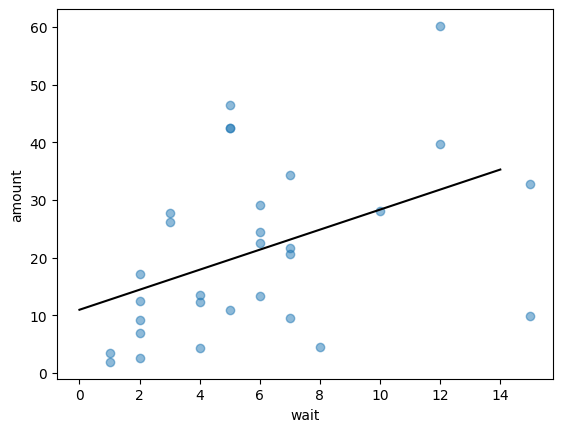

In [41]:
plt.plot(groceries.wait,groceries.amount, "o", alpha=0.5)
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)], color='k')
plt.xlabel("wait")
plt.ylabel("amount")
plt.show()

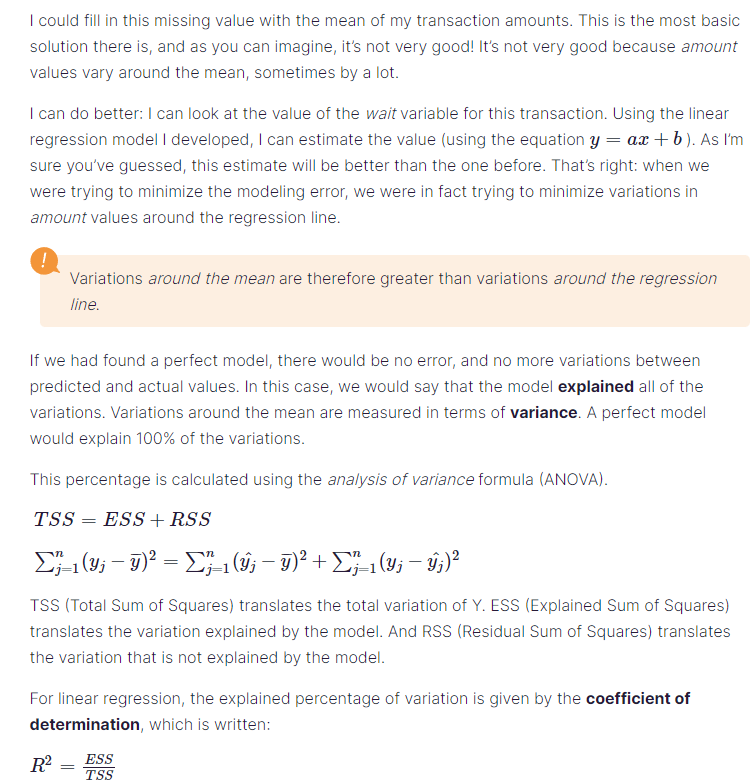

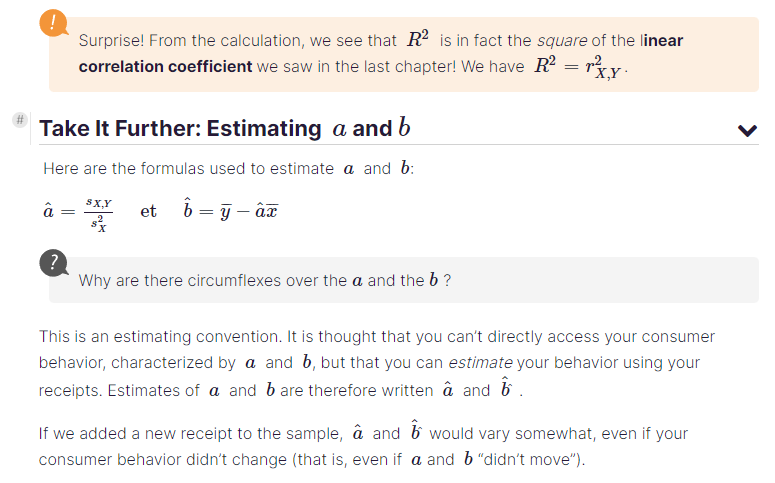

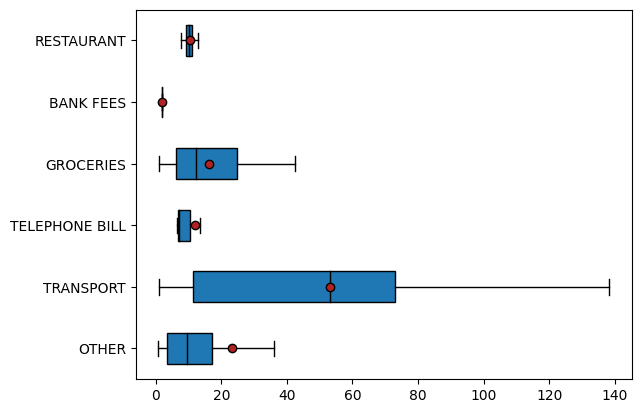

In [42]:
X = "categ" # qualitative
Y = "amount" # quantitative

# Only expenses are retained
sub_sample = data[data["amount"] < 0].copy()
# Expenses are converted to positive amounts
sub_sample["amount"] = -sub_sample["amount"]
# Rents are not included because too large:
sub_sample = sub_sample[sub_sample["categ"] != "RENT"] 

categories = sub_sample[X].unique()
groups = []
for m in categories:
    groups.append(sub_sample[sub_sample[X]==m][Y])

# print(groups)
    
# Graph properties (not very important)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
            
plt.boxplot(groups, labels=categories, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [43]:
# sub_sample[sub_sample[X]==m][Y]
sub_sample['categ'].unique()

array(['OTHER', 'TRANSPORT', 'TELEPHONE BILL', 'GROCERIES', 'BANK FEES',
       'RESTAURANT'], dtype=object)

In [44]:
X = "categ" # qualitative
Y = "amount" # quantitative

sub_sample = data[data["amount"] < 0] # Only expenses are retained 

def eta_squared(x,y):
    mean_y = y.mean()
    categories = []
    for category in x.unique():
        yi_category = y[x==category]
        categories.append({'ni': len(yi_category),
                        'mean_category': yi_category.mean()})
    TSS = sum([(yj-mean_y)**2 for yj in y])
    ESS = sum([c['ni']*(c['mean_category']-mean_y)**2 for c in categories])
    return ESS/TSS
 
eta_squared(sub_sample[X],sub_sample[Y])


0.39841890401094926

In [45]:
# import random

# a = random.randint(1,30)
# a

In [46]:
# sub_sample["amount"][sub_sample["categ"]=='TRANSPORT'] == sub_sample[sub_sample["categ"]=='TRANSPORT']["amount"]

In [47]:
# sub_sample["amount"]

In [48]:
# sub_sample[sub_sample["categ"]=='TRANSPORT']

In [49]:
X = "quart_month"
Y = "categ"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,BANK FEES,GROCERIES,OTHER,RENT,RESTAURANT,TELEPHONE BILL,TRANSPORT,Total
quart_month,,,,,,,,
1,7.0,6.0,55.0,NaN,3.0,6.0,9.0,86
2,NaN,11.0,45.0,6.0,7.0,1.0,6.0,76
3,NaN,7.0,60.0,NaN,4.0,NaN,4.0,75
4,NaN,15.0,52.0,NaN,2.0,NaN,2.0,71
Total,7.0,39.0,212.0,6.0,16.0,7.0,21.0,308


In [50]:
# tx = pd.DataFrame(tx)

# ty = pd.DataFrame(ty)
# tx.columns = ["foo"]
# ty.columns = ["foo"]
# n = len(data)
# indep = tx.dot(ty.T) / n

# c = c.fillna(0) # Null values are replaced by 0
# measure = (c-indep)**2/indep
# xi_n = measure.sum().sum()
# sns.heatmap(measure/xi_n,annot=c)
# plt.show()

iris : 150 individuals, iris_dna : 146 individuals


/home/peterparker/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


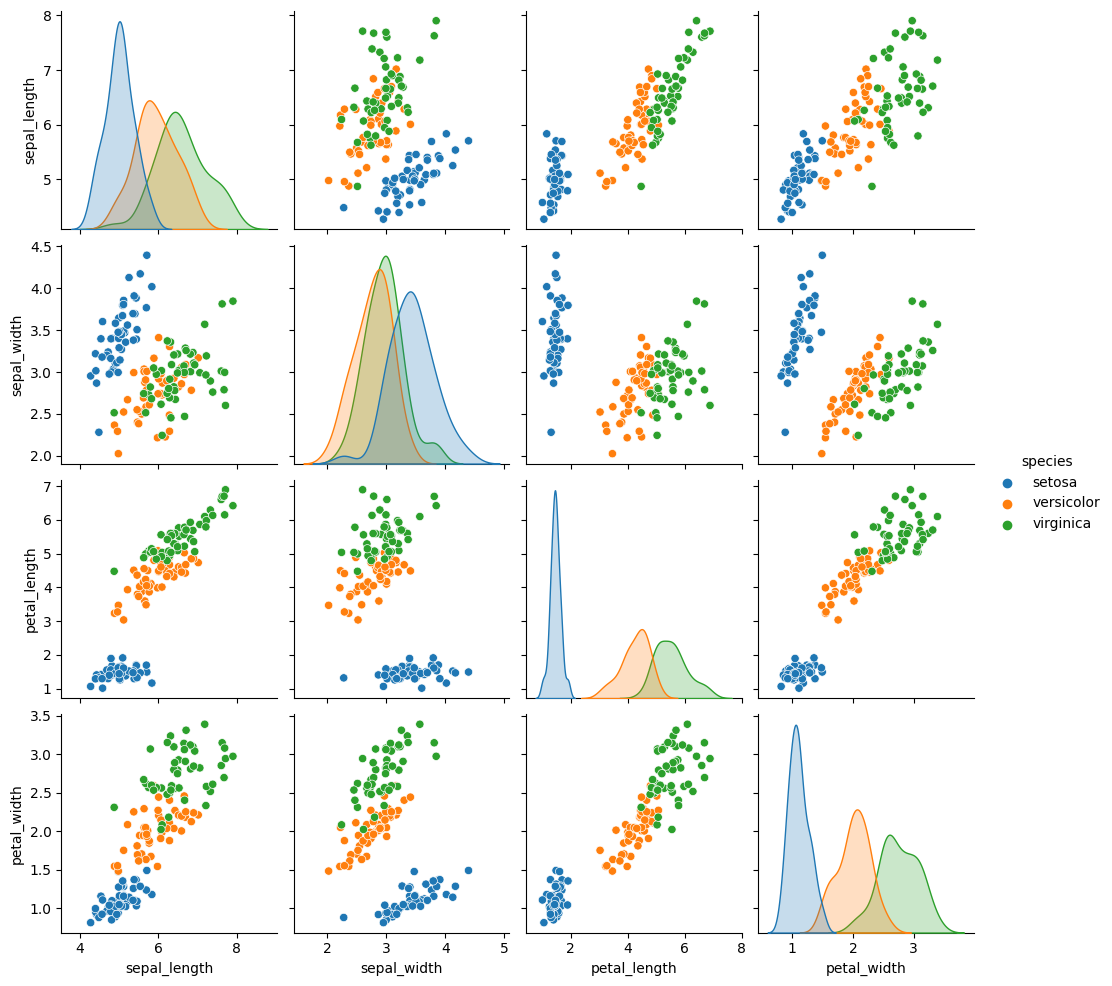

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download
iris = pd.read_csv("iris_dataset.csv")


# Rename the columns
iris.columns = ["id","sepal_length","sepal_width","petal_length","petal_width","species"]

# Delete the identifiers
del iris["id"]

# Delete individuals with at least one missing value
iris_dna = iris.dropna(axis=0, how='any') # Me encanta este método
print("iris : {} individuals, iris_dna : {} individuals".format(len(iris),len(iris_dna)))

# Show dispersion diagrams
sns.pairplot(iris_dna,hue="species")
plt.show()

In [52]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.138728,3.470118,1.441015,1.094873,setosa
1,4.849873,3.034931,1.414931,0.968687,setosa
2,4.715843,3.239083,1.295309,1.006643,setosa
3,4.603747,NaN,1.480616,1.002344,setosa
4,4.988744,3.645049,1.417527,1.122947,setosa
...,...,...,...,...,...
145,6.664208,2.994751,5.219754,3.061857,virginica
146,6.319889,2.453381,5.035004,2.536681,virginica
147,6.488279,2.989227,5.203232,2.749461,virginica
148,6.228777,3.371570,5.416274,3.153742,virginica


In [53]:
iris_setosa = iris_dna[iris_dna["species"] == "setosa"]
iris_virginica = iris_dna[iris_dna["species"] == "virginica"]
iris_versicolor = iris_dna[iris_dna["species"] == "versicolor"]

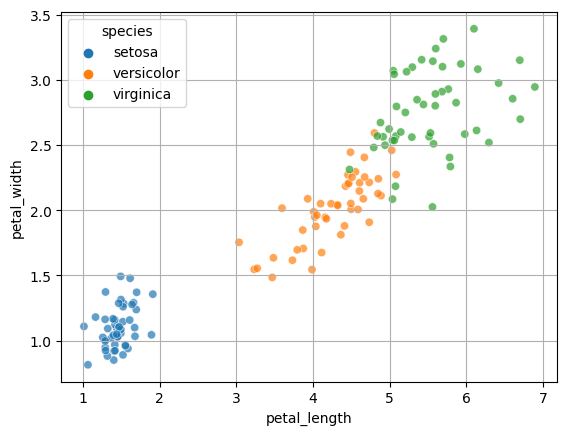

In [54]:
plt.grid()
sns.scatterplot(data=iris_dna, x='petal_length', y='petal_width',alpha=0.7,hue='species')
plt.show()

In [55]:
# Coeficiente de correlación/coeficiente de correlación lineal/Coeficiente de correlación de Pearson
st.pearsonr(iris_dna['petal_length'],iris_dna['petal_width'])[0]

0.9418817573025174

In [56]:
# Coeficiente de correlación/coeficiente de correlación lineal/Coeficiente de correlación de Pearson
st.pearsonr(iris_setosa['petal_length'],iris_setosa['petal_width'])[0]

0.3682077901530097

In [57]:
# Coeficiente de correlación/coeficiente de correlación lineal/Coeficiente de correlación de Pearson
st.pearsonr(iris_virginica['petal_length'],iris_virginica['petal_width'])[0]

0.3589990526220604

In [58]:
# Coeficiente de correlación/coeficiente de correlación lineal/Coeficiente de correlación de Pearson
st.pearsonr(iris_versicolor['petal_length'],iris_versicolor['petal_width'])[0]

0.7871447591900509

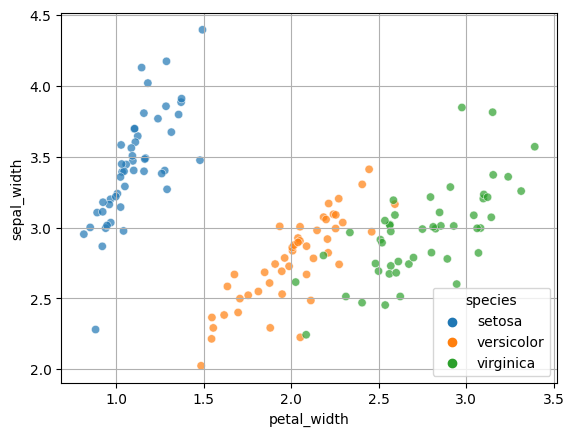

In [59]:
plt.grid()
sns.scatterplot(data=iris_dna, x='petal_width', y='sepal_width',alpha=0.7,hue='species')
plt.show()

In [60]:
# Coeficiente de correlación/coeficiente de correlación lineal/Coeficiente de correlación de Pearson
st.pearsonr(iris_dna['petal_width'],iris_dna['sepal_width'])[0]

-0.247971306157846

In [61]:
# Coeficiente de correlación/coeficiente de correlación lineal/Coeficiente de correlación de Pearson
st.pearsonr(iris_setosa['petal_width'],iris_setosa['sepal_width'])[0]

0.7531349595699939

In [62]:
# Coeficiente de correlación/coeficiente de correlación lineal/Coeficiente de correlación de Pearson
st.pearsonr(iris_virginica['petal_width'],iris_virginica['sepal_width'])[0]

0.6850773581335285

In [63]:
# Coeficiente de correlación/coeficiente de correlación lineal/Coeficiente de correlación de Pearson
st.pearsonr(iris_versicolor['petal_width'],iris_versicolor['sepal_width'])[0]

0.8250525564073544

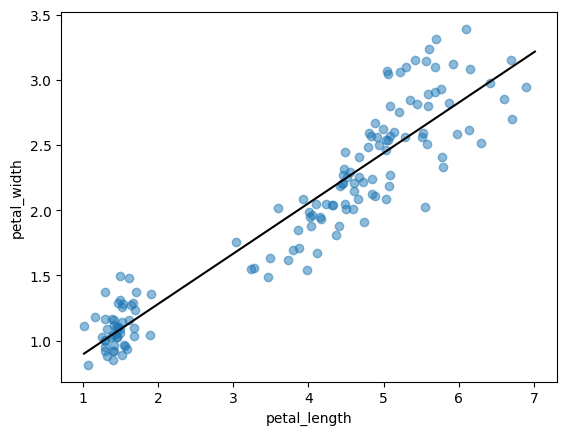

In [64]:
Y = iris_dna['petal_width']
X = iris_dna[['petal_length']]
X = X.copy() # X will be modified, so a copy is created
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Squares 
a,b = result.params['petal_length'],result.params['intercept']

plt.plot(iris_dna.petal_length,iris_dna.petal_width, "o", alpha=0.5)
plt.plot(np.arange(min(iris_dna['petal_length']),max(iris_dna['petal_length']+1)),\
         [a*x+b for x in np.arange(min(iris_dna['petal_length']),max(iris_dna['petal_length']+1))], color='k')
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

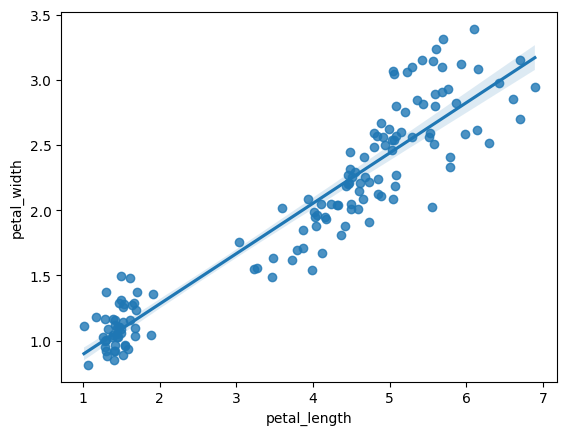

In [65]:
sns.regplot(x="petal_length", y="petal_width", data=iris_dna);

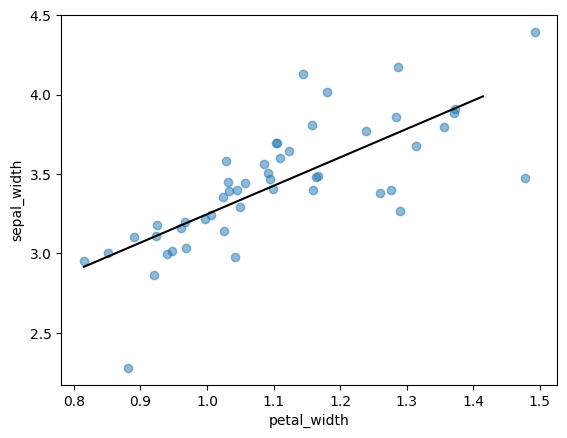

In [66]:
Y = iris_setosa['sepal_width']
X = iris_setosa[['petal_width']]
X = X.copy() # X will be modified, so a copy is created
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Squares 
a,b = result.params['petal_width'],result.params['intercept']

plt.plot(iris_setosa.petal_width,iris_setosa.sepal_width, "o", alpha=0.5)
plt.plot(np.arange(min(iris_setosa['petal_width']),max(iris_setosa['petal_width']),0.1),\
         [a*x+b for x in np.arange(min(iris_setosa['petal_width']),max(iris_setosa['petal_width']),0.1)], color='k')
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()

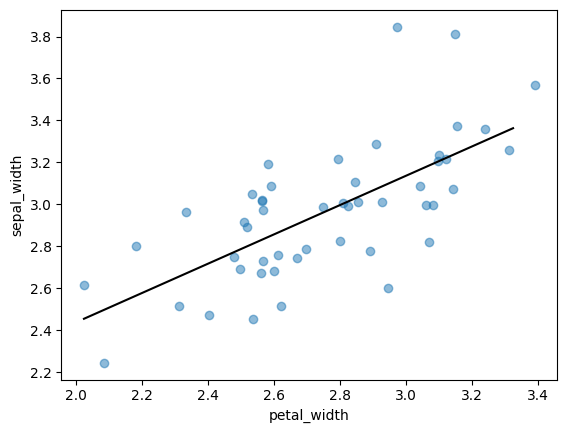

In [67]:
Y = iris_virginica['sepal_width']
X = iris_virginica[['petal_width']]
X = X.copy() # X will be modified, so a copy is created
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Squares 
a,b = result.params['petal_width'],result.params['intercept']

plt.plot(iris_virginica.petal_width,iris_virginica.sepal_width, "o", alpha=0.5)
plt.plot(np.arange(min(iris_virginica['petal_width']),max(iris_virginica['petal_width']),0.1),\
         [a*x+b for x in np.arange(min(iris_virginica['petal_width']),max(iris_virginica['petal_width']),0.1)], color='k')
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()

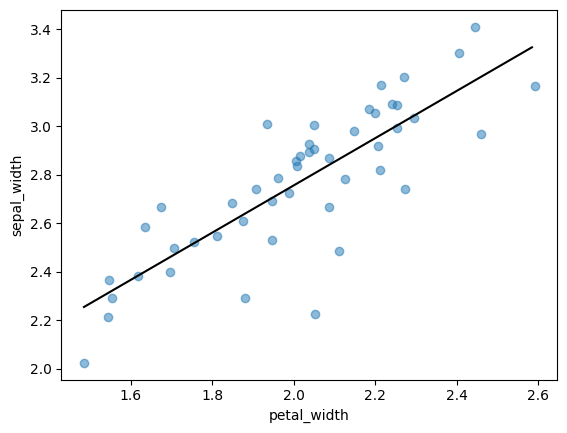

In [68]:
Y = iris_versicolor['sepal_width']
X = iris_versicolor[['petal_width']]
X = X.copy() # X will be modified, so a copy is created
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Squares 
a,b = result.params['petal_width'],result.params['intercept']

plt.plot(iris_versicolor.petal_width,iris_versicolor.sepal_width, "o", alpha=0.5)
plt.plot(np.arange(min(iris_versicolor['petal_width']),max(iris_versicolor['petal_width']),0.1),\
         [a*x+b for x in np.arange(min(iris_versicolor['petal_width']),max(iris_versicolor['petal_width']),0.1)], color='k')
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()

In [69]:
coeffs = {
    "case 1" : {'a': [...] , 'b':[...]},
    "case 2" : {'a': [...] , 'b':[...]},
    "case 3" : {'a': [...] , 'b':[...]},
    "case 4" : {'a': [...] , 'b':[...]},
}
modified_lignes = []

for (i,individual) in iris.iterrows(): # for every individual of Iris,...
    if pd.isnull(individu["petal_width"]): #... we test if individual["petal_width"] is null.
        a = coeffs["case 1"]['a']
        b = coeffs["case 1"]['b']
        X = individual["petal_length"]
        Y = a*X + b
        iris.loc[i,"petal_width"] = Y # we replace the missing value by Y
        modified_lines.append(i)
        print("we filled petal_width with {} based on petal_length={}".format(Y,X))
        
    if pd.isnull(individual["sepal_width"]):
        espece = individual["species"]
        X = individual["petal_width"]
        [...]
        modified_lines.append(i)
        print("We filled sepal_width with {} based on the species:{} and petal_width={}".format(Y,species,X))
        
print(iris.loc[modified_lines])


NameError: name 'individu' is not defined